#Zadanie 2 (7 pkt)
Celem zadania jest rozwiązanie zadania optymalizacji przy pomocy algorytmu genetycznego. Należy znaleźć minimum zadanej funkcji:
\begin{equation}
f(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}
Należy wykorzystać mechanizmy krzyżowania punktowego, mutacji oraz selekcji turniejowej. Proszę wykorzystać przygotowany szkielet i zaimplementować niezbędne metody. Opracowane oprogramowanie powinno być uniwersalne - wymiar funkcji, której minimum szukamy może być dowolny (mechanizm *args). Punktacja wygląda następująco:

*   ✓ Stworzenie obiektu klasy *Chromosome* z polem *array*, które jest wektorem aktywnych i nieaktywnych genów - **0.5 pkt** ✓
*   ✓ Implementacja metody *decode*, która dekoduje część chromosomu (określoną przez początek (*lower_bound*) i koniec (*upper_bound*)) do postaci liczby rzeczywistej. *aoi* to zakres wartości zdekodowanej liczby rzeczywistej. Przykład: liczba 135 w postaci binarnej zapisana przy użyciu 8 bitów to 1000 0111, jeśli nasze *aoi* to [0, 1], to 135 sprowadzone do tego zakresu to 0.529. Można skorzystać z funkcji pomocniczej *min_max_norm* - **1 pkt** ✓
*   ✓ Implementacja metody *mutation*, która przyjmuje jako argument prawdopodobieństo mutacji i zmienia wartość jedego, losowego genu na przeciwną - **0.5 pkt** ✓
*   ✓ Implementacja metody *crossover*, która wykonuje operację krzyżowania jednopunktowego - **1 pkt**✓


- dowolny wymiar funkcji (x/xy/xyz/...)

TEST WNIOSKÓW: https://docs.google.com/spreadsheets/d/1x-3l8JD4eN8trVKS-qm8eo94WXs2IbmcsrXWim_gH0g/edit#gid=0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
'''Maps value from one range to another, ex. 0-255 -> 0-1'''
def min_max_norm(val, old_min, old_max, new_min, new_max):
  return (val - old_min) * (new_max - new_min) / (old_max - old_min) + new_min

In [ ]:
class Chromosome:
  def __init__(self, length, array=None): #if array is None it should be initialized with random binary vector
    if array is None:
      array = np.random.randint(2, size=length)
    self.genes = array # Array - active (1) or inactive (0) genes


  '''Decodes genes <lower, upper> to a number in aoi range'''
  def decode(self, lower_bound, upper_bound, aoi):
    to_decode = self.genes[lower_bound:upper_bound+1]
    # print(to_decode)

    decimal = "".join([str(i) for i in to_decode])
    decimal = int(decimal, 2)
    # print(decimal)

    ratio = min_max_norm(decimal, 0, 2**len(to_decode)-1, aoi[0], aoi[1])
    # ratio = round(ratio, 3)
    # print(ratio)
    return ratio


  '''Mutates/Not mutates one randomly selected gene with given probability'''
  def mutation(self, probability):
    if random.choices([True, False], weights=[probability, 1-probability])[0]:
      mut_index = random.randint(0, len(self.genes)-1)
      self.genes[mut_index] += (-1)**self.genes[mut_index]
      # print("Mutated")
    else:
      # print("Not mutated")
      pass


  '''Genes <pivot,-1> of self and other get interchanged'''
  def crossover(self, other):
    # Pivot = index of first element in second part (cannot be before first/after last element)
    pivot = random.randint(1, len(self.genes)-1)
    # print(pivot)
    # Creating new arrays
    child1, child2 = np.zeros_like(self.genes), np.zeros_like(self.genes)
    child1[:pivot] = self.genes[:pivot]
    child1[pivot:] = other.genes[pivot:]
    child2[:pivot] = other.genes[:pivot]
    child2[pivot:] = self.genes[pivot:]
    lenght = len(child1)
    return Chromosome(lenght, child1), Chromosome(lenght, child2)


# Testing

## Chromosomes showcase

In [ ]:
chromA = Chromosome(4)
chromB = Chromosome(4)
chromA.genes, chromB.genes

(array([1, 1, 1, 1]), array([0, 1, 0, 0]))

In [ ]:
np.zeros_like(chromA.genes)

array([0, 0, 0, 0])

In [ ]:
print("Chromosome A decoded")
chromA.decode(0,3, [0,1])
print("\nChromosome B decoded")
chromB.decode(0,3, [0,1])

Chromosome A decoded
[1 1 0 1]
13
0.8666666666666667

Chromosome B decoded
[1 1 0 0]
12
0.8


0.8

In [ ]:
print(chromA.genes)
chromA.mutation(0.7)
print(chromA.genes)

[0 1 0 0]
Mutated
[1 1 0 0]


In [ ]:
chromA.crossover(chromB)

2


In [ ]:
chromA.genes, chromB.genes

(array([1, 1, 1, 1]), array([0, 1, 0, 0]))

In [ ]:
chromA.crossover(chromB)

1


(array([1, 1, 1, 1]),
 array([0, 1, 0, 0]),
 array([1, 1, 0, 0]),
 array([0, 1, 1, 1]))

In [ ]:
chromA.genes, chromB.genes

(array([1, 1, 0, 1]), array([1, 1, 0, 0]))

In [ ]:
chromC = Chromosome(8)
chromC.genes

array([1, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
chromC.decode(0,3,[0,1])

[1 1 0 0]
12
0.8


0.8

In [ ]:
chromC.decode(4,7,[0,1])

[0 1 0 1]
5
0.3333333333333333


0.3333333333333333

In [ ]:
def test_eval_objective_func(chromosome):
    argument_values = []
    for arg_index in range(2):
      arg_start = 4 * arg_index
      arg_end = 4 * (arg_index+1) -1
      arg_value = chromosome.decode(arg_start, arg_end, [0,1])
      argument_values.append(arg_value)
    return(f(argument_values))

test_eval_objective_func(chromC)

[1 1 0 0]
12
0.8
[0 1 0 1]
5
0.3333333333333333


1.0260825872772663

In [ ]:
chromTest1 = Chromosome(8, np.array([0, 1, 1, 1, 1, 1, 0, 1]))
chromTest2 = Chromosome(8, np.array([0, 0, 1, 1, 0, 1, 0, 1]))
chromTest2.genes

array([0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
# min([chromTest1, chromTest2], lambda contestant: test_eval_objective_func(contestant))
test_eval_objective_func(chromTest1)
min(["aaa", "A"], key=lambda x: len(x))

'A'

## GeneticAlgorithm showcase

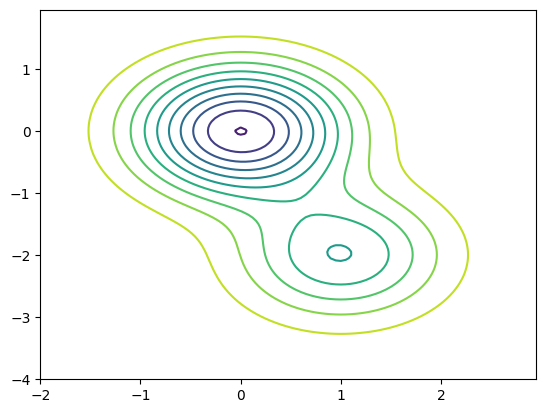

In [ ]:
genAlg.plot_func([])

In [ ]:
genAlg.eval_objective_func(chromC)

[1 1 0 0]
12
1.2000000000000002
[0 1 0 1]
5
-0.6666666666666667


1.2668934633992242

In [ ]:
genAlg = GeneticAlgorithm(8, 2, f, [-2,2], population_size=10, tournament_size=2, crossover_probability=0.5)

In [ ]:
r_p = genAlg.run()

Failed to crossover
p1 [1 1 0 1 1 0 1 0] p2 [0 1 1 0 1 1 1 0]
2
p1 [1 0 1 0 0 1 1 1] p2 [1 1 0 0 1 1 1 0] c1 [1 0 0 0 1 1 1 0] c2 [1 1 1 0 0 1 1 1]
Failed to crossover
p1 [0 0 0 1 0 0 0 0] p2 [0 0 1 0 0 1 0 0]
Failed to crossover
p1 [1 1 0 0 1 1 1 0] p2 [1 0 0 0 0 1 1 0]
2
p1 [1 0 1 0 1 0 1 0] p2 [1 0 0 1 1 1 0 0] c1 [1 0 0 1 1 1 0 0] c2 [1 0 1 0 1 0 1 0]


In [ ]:
r_p
for i in r_p:
  print(i.genes)

[1 1 0 1 1 0 1 0]
[0 1 1 0 1 1 1 0]
[1 0 0 0 1 1 1 0]
[1 1 1 0 0 1 1 1]
[0 0 0 1 0 0 0 0]
[0 0 1 0 0 1 0 0]
[1 1 0 0 1 1 1 0]
[1 0 0 0 0 1 1 0]
[1 0 0 1 1 1 0 0]
[1 0 1 0 1 0 1 0]


## General Testing

In [ ]:
chrom = Chromosome(4)

In [ ]:
chrom.decode(0,3,1)

[1 0 1 0]
10
0.667


0.667

In [ ]:
round(135/255,3)

0.529

In [ ]:
chrom.genes

array([1, 0, 1, 0])

In [ ]:
b = chrom.genes
b[:] = [0,1,2,3]
b
p=2
b[:p]
b[p:]

array([2, 3])

In [ ]:
b = chrom.genes
b = [str(a) for a in b]
b
# b = [str(i) for i in b]
# b = "".join(b)
# int(b, 2)
# # b

['1', '1', '1', '1']

In [ ]:
chrom.mutation(0.5)

Not mutated


In [ ]:
random.choices([True, False], weights=[0.5, 1-0.5])[0]

True

In [ ]:
a = np.array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0])
random.randint(0,len(a)-1)
a[0:9]

array([0, 1, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
pivot = random.randint(1, len(a)-1)
pivot=3
print(pivot)
buff = np.copy(a[pivot:])
a[pivot:] = b[pivot:]
print(buff)
b[pivot:] = buff
a, b

3
[4]


(array([1, 2, 3, 8]), array([5, 6, 7, 4]))

# C.D.

## Założenia
Założenie - 1 osobnik - 1 chromosom, składający się z n bitów, po m bitów na każdy argument funkcji  
np. _ _ _ _ _ _ _ _ - 8 bitów na x, y każde po 4 bity  

1. REPRODUKCJA = SELEKCJA  
= turniejowa, turnieje po 2 osobniki, losujemy je i wybieramy lepszego; robimy to do osiagniecia tylu osobnikow co poczatkowo w populacji  
2. GENEROWANIE NOWEGO POKOLENIA  
= krzyzowanie z pewnym prawdopodobienstwem, albo przerzucenie rodzicow  
  *Krzyzowanie*:  
  Podejscie 1 - dla każdego chromosomu dolosować drugiego rodzica  
  Podejscie 2 - lista z wszystkimi indexami, przetasowac, brac po kolei po 2 -> kazdy osobnik z listy przejdzie przez proces zostania rodzicem, bedzie to dokladnie raz  
        np [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] -> [2, 5, 3, 4, 1, 6, 7, 0, 8, 9] -> pary [2,5], [3,4], ...  
  **Wybrałam: podejscie 2**

## Treść c.d.
*   ✓ Implementacja metody *eval_objective_func*, która dekoduje cały chromosom (otrzymuje się argumenty funkcji) oraz zwraca wartość funkcji celu dla tych argumentów - **1 pkt**✓
*   ✓ Implementacja metody *tournament_selection*, która przeprowadza selekcję turniejową - **1 pkt**✓
*   ✓ Implementacja metody *reproduce*, która generuje nowe pokolenie - z pewnym prawdopodobieństwem przeprowadza krzyżowanie jednopunktowe lub "przerzuca" rodziców do nowego pokolenia - **0.5 pkt**✓
*   ✓ Implementacja metody *run*, która wykonuje cały alorytm genetyczny dla określonej liczby pokoleń. W każdym pokoleniu należy zapisać dane osobnika z najlepszym chromosomem zdekodowane wartości x i y oraz wartość funkcji strat dla tego osobnika - **0.5 pkt**✓
*   ✓ Proszę, podobnie jak miało to miejsce w przypadku metody gradientowej z poprzednich zajęć, wygenerować wykres przy użyciu funkcji *plot_func* (w przypadku innego typu argumentu *trace*, funkcję można zmodyfikować. Wykres powinien przedstawiać funkcję, której minimum poszukujemy oraz punkty odpowiadające najlepszym osobnikom w danych generacjach, których kolor jest coraz jaśniejszy wraz ze zbliżaniem się do minimum. Proszę zapisać swoje wnioski, w szczególności w odniesieniu do metody gradientowej. - **1 pkt**✓

# GeneticAlgorithm

In [ ]:
def f(arguments):
  x, y = arguments
  return 1.5 - np.exp(-x ** (2) - y ** (2)) - 0.5 * np.exp(-(x - 1) ** (2) - (y + 2) ** (2))


In [ ]:
import colorsys

'''Returns n colors changing gradually, in rgb or hex format '''
def generate_color_range(n_of_colors, hex=False):
  colors = []
  max_hue = 360.
  max_vanted_hue = 280.
  step = max_vanted_hue/n_of_colors
  for i in range(n_of_colors):
      rgb = colorsys.hsv_to_rgb(i*step/max_hue, 1.0, 1.0)
      color = [round(255*x) for x in rgb]
      if hex:
        color = '#%02x%02x%02x' % tuple(color)
      colors.append(color)

  return colors


In [ ]:
class GeneticAlgorithm:
  def __init__(self, chromosome_length, obj_func_num_args, objective_function, aoi, population_size=1000,
               tournament_size=2, mutation_probability=0.05, crossover_probability=0.8, num_steps=30):
    assert chromosome_length % obj_func_num_args == 0, "Number of bits for each argument should be equal"
    assert population_size > 1, "Population must be greater than 0"
    assert tournament_size <= population_size, "Tournament size must be equal/smaller than population"
    self.chromosome_length = chromosome_length
    self.obj_func_num_args = obj_func_num_args
    self.bits_per_arg = int(chromosome_length / obj_func_num_args)
    self.objective_function = objective_function
    self.aoi = aoi
    self.population_size = population_size
    self.tournament_size = tournament_size
    self.mutation_probability = mutation_probability
    self.crossover_probability = crossover_probability
    self.num_steps = num_steps


  '''Decode chromosome to arguments'''
  def find_arguments_from_chromosome(self, chromosome):
    argument_values = []
    for arg_index in range(self.obj_func_num_args):
      arg_start = self.bits_per_arg * arg_index
      arg_end = self.bits_per_arg * (arg_index+1) -1
      arg_value = chromosome.decode(arg_start, arg_end, self.aoi)
      argument_values.append(arg_value)
    return argument_values


  '''Calculates value of objective function with arguments taken from decoded chromosome'''
  def eval_objective_func(self, chromosome):
    # Find argument values
    argument_values = self.find_arguments_from_chromosome(chromosome)
    # Calculate objective function value
    return self.objective_function(argument_values)


  '''Selecting population_size individuals from parents by tournaments\n
    Tournament - drawing indexes of competing individuals, choosing one with better objective function'''
  def tournament_selection(self, parents, verbose=0):
    selected_individuals = []

    # Repeating until we get the same amount of individuals as was population_size
    for i in range(self.population_size):
      contestants_indexes = np.random.choice(self.population_size, self.tournament_size, replace=False)
      contestants = [parents[index] for index in contestants_indexes]
      winner = min(contestants, key=lambda contestant: self.eval_objective_func(contestant))
      # selected_individuals.append(winner)# MUSIMY DODAC KOPIE, A NIE TEN OBIEKT; KOPIE ROWNIEZ ARRAY GENOW
      selected_individuals.append(Chromosome(len(winner.genes), np.copy(winner.genes)))
      if verbose:
        print("\nTournament", i)
        print("contestants_indexes:",contestants_indexes)
        print("contestants_genes:",contestants[0].genes, contestants[1].genes)
        print("obj_func_values:",[self.eval_objective_func(contestant) for contestant in contestants])
        print("Winner:", winner.genes)

    return np.array(selected_individuals)


  ''' Creates next generation. Puts there parents' 2 children if crossover succeeds (crossover_probability)/ both parents if it failes.\n
    Possible mutation '''
  def reproduce(self, parents):

    reproduced_individuals = []
    # Determining parent pairs (by shuffling parent indexes list)
    parent_indexes = [i for i in range(self.population_size)]
    random.shuffle(parent_indexes)

    # For each parent pair
    for i in range(len(parent_indexes)):
      if i%2==0:

        parent1 = parents[parent_indexes[i]]

        # Normal case, individual has pair
        if i != len(parent_indexes)-1:
          parent2 = parents[parent_indexes[i+1]]
          ind_to_take = 2
        # Last individual doesn't have pair -> drawing 2nd parent, putting one of children/one of parents to next generation
        else:
          parent2 = parents[random.randint(0,len(parent_indexes)-1-1)]
          ind_to_take = 1

        # Try to reproduce
        if random.choices([True, False], weights=[self.crossover_probability, 1-self.crossover_probability])[0]:
          child1, child2 = parent1.crossover(parent2)
          # print("p1",parent_indexes[i],parent1.genes,"p2",parent_indexes[i+1],parent2.genes,"c1",child1.genes,"c2",child2.genes)
          reproduced_individuals.extend(random.sample([child1, child2], ind_to_take))
        else:
          # print("Failed to crossover","\np1",parent_indexes[i],parent1.genes,"p2",parent_indexes[i+1],parent2.genes)
          reproduced_individuals.extend(random.sample([parent1, parent2], ind_to_take))

    # Possible mutation
    for individual in reproduced_individuals:
      # print("before_mut:", individual.genes, individual)
      individual.mutation(self.mutation_probability)
      # print("after_mut :", individual.genes, individual)

    return np.array(reproduced_individuals)


  '''Find individual with chromosome of smallest obj_fun_val in population'''
  def find_best_individual(self, population):
    min_obj_fun_val = float("inf")
    best_chromosome = None
    best_arguments = None

    for individual in population:
      if self.eval_objective_func(individual) < min_obj_fun_val:
        min_obj_fun_val = self.eval_objective_func(individual)
        best_chromosome = individual

    best_arguments = self.find_arguments_from_chromosome(best_chromosome)
    return best_chromosome.genes, min_obj_fun_val, best_arguments


  def plot_func(self, generations: list[np.ndarray[Chromosome]] = None, best_args_from_generations: list[np.ndarray] = None, show_generations = False, show_best_args = False, figsize=(6,5)):
    # PLOTTING FUNCTION
    X = np.arange(-2, 3, 0.05)
    Y = np.arange(-4, 2, 0.05)
    X, Y = np.meshgrid(X, Y)
    Z = 1.5 - np.exp(-X ** (2) - Y ** (2)) - 0.5 * np.exp(-(X - 1) ** (2) - (Y + 2) ** (2))
    plt.figure(figsize=figsize)
    plt.contour(X, Y, Z, 10)
    legend_exists = False

    gen_colors = generate_color_range(len(generations), hex=True)
    # PLOTTING GENERATIONS
    if show_generations:
      # List of lists of Chromosomes -> list of lists of arguments
      generations_args = [[self.find_arguments_from_chromosome(chromosome) for chromosome in generation] for generation in generations]
      for gen_nr in range(len(generations)):
        plt.scatter([x[0] for x in generations_args[gen_nr]], [x[1] for x in generations_args[gen_nr]], s=10, color=gen_colors[gen_nr], label="generation"+str(gen_nr))
      legend_exists = True

    # PLOTTING BEST ARGUMENTS FROM GENERATIONS
    if show_best_args:
      # legend aready exists, only add label distintion
      if legend_exists:
        plt.scatter([x[0] for x in best_args_from_generations], [x[1] for x in best_args_from_generations], s=60, c=gen_colors, marker="x", label="best from generations")#color="#000000",
      # legend has to be created
      else:
        for gen_nr in range(len(best_args_from_generations)):
          args = best_args_from_generations[gen_nr]
          plt.scatter([args[0]], [args[1]], s=60, c=gen_colors[gen_nr], marker="x", label="best from generation"+str(gen_nr))#color="#000000",
        legend_exists = True

    if legend_exists:
      plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize="7")
    plt.show()


  def run(self):
    # Initial population
    current_population = np.array([Chromosome(self.chromosome_length) for individual in range(self.population_size)])

    best_obj_val = float("inf")
    best_arguments = None
    best_genes = None
    best_obj_val_list, best_arguments_list, best_genes_list = [], [], [] # na pewno dzialaja dobrze i nie zmieniaja wartosci gdy osobnik potem zmieni swoje geny
    all_generations_list = []

    # dopoki nie osiagnieto max liczby pokolen (num_steps)
    for generation_nr in range(self.num_steps+1):

      all_generations_list.append(current_population)

      # OCENA osobnikow i znalezienie najlepszego
      best_gen_genes, best_gen_obj_val, best_gen_arguments = self.find_best_individual(current_population)
      best_obj_val_list.append(best_gen_obj_val)
      best_arguments_list.append(best_gen_arguments)
      best_genes_list.append(best_gen_genes)
      if best_gen_obj_val < best_obj_val:
        best_obj_val = best_gen_obj_val
        best_arguments = best_gen_arguments
        best_genes = best_gen_genes

      # print("BEST_GENES_LIST:",best_genes_list)
      if generation_nr == self.num_steps:
        break

      # REPRODUKCJA - turniejowa, z wiekszym prawd. przechodza lepsze osobniki
      selected_from_population = self.tournament_selection(current_population)
      # SUKCESJA = KRZYZOWANIE I MUTACJA - przerzuca dzieci/rodzicow do nowego pokolenia
      crossed_and_mutated = self.reproduce(selected_from_population)
      # nadpisanie populacji
      current_population = crossed_and_mutated
      # print(current_population)

    print("Best result:", best_obj_val, best_arguments, best_genes)
    return best_obj_val_list, best_arguments_list, best_genes_list, all_generations_list


  def run_results(self, show_generations, show_best_args, figsize=(6,5)):
    best_obj_val_list, best_arguments_list, best_genes_list, all_generations_list = self.run()
    print("Last result:", best_obj_val_list[-1], best_arguments_list[-1], best_genes_list[-1])
    self.plot_func(all_generations_list, best_arguments_list, show_generations, show_best_args, figsize)
    # print(best_arguments_list)





In [ ]:
chrom1 = Chromosome(8, [1, 0, 1, 0, 0, 0, 1, 0])
chrom2 = Chromosome(8, [1, 0, 1, 0, 0, 1, 1, 0])
genAlg.eval_objective_func(chrom1), genAlg.eval_objective_func(chrom2)

(1.3565355379445696, 1.1121655714123213)

Best result: 0.4982002643510572 [0.004058961760307511, -0.04785302285836357] [1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0]
Last result: 0.49941338690117626 [0.002349925229651717, 0.04699850459303612] [1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0]


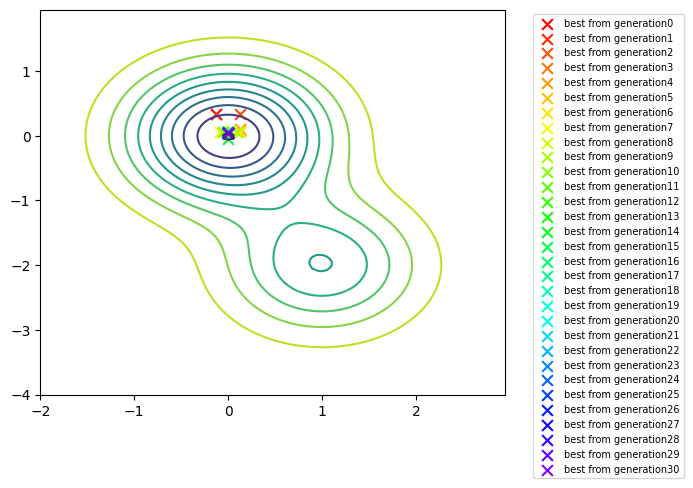

In [ ]:
genAlg = GeneticAlgorithm(30, 2, f, [-4,3], population_size=100, tournament_size=2, crossover_probability=0.8, mutation_probability=0.05, num_steps=30)
genAlg.run_results(False, True)

Best result: 0.5126165379577735 [-0.04400769066438803, 0.11279641102328597] [1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0]
Last result: 0.5126165379577735 [-0.04400769066438803, 0.11279641102328597] [1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0]


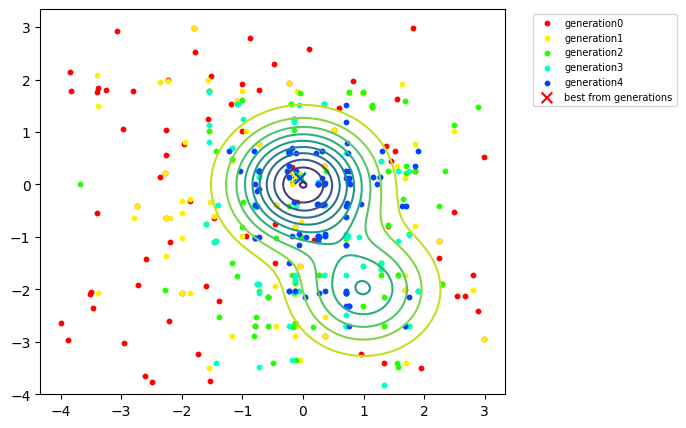

In [ ]:
genAlg = GeneticAlgorithm(30, 2, f, [-4,3], population_size=100, tournament_size=2, crossover_probability=0.8, mutation_probability=0.05, num_steps=4)
genAlg.run_results(True, True)

Best result: 0.49657337323072936 [0.0034180730613115884, -0.007904293954283492] [1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1]
Last result: 0.49657337323072936 [0.0034180730613115884, -0.007904293954283492] [1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1]


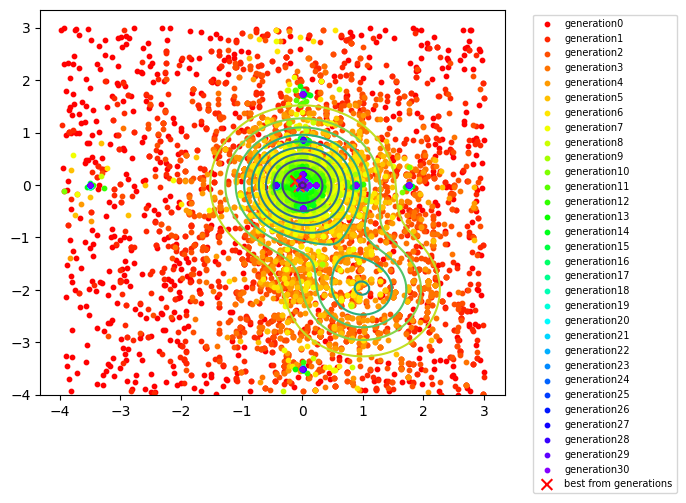

In [ ]:
genAlg = GeneticAlgorithm(30, 2, f, [-4,3], population_size=1000, tournament_size=2, crossover_probability=0.8, mutation_probability=0.05, num_steps=30)
genAlg.run_results(True, True)

Best result: 0.4965724965008781 [0.0034180730613115884, -0.007049775688955151] [1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1]
Last result: 0.4965724965008781 [0.0034180730613115884, -0.007049775688955151] [1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1]


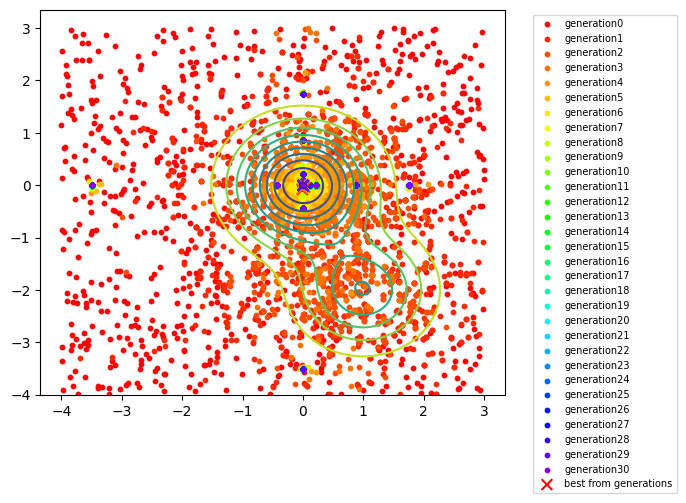

In [ ]:
genAlg = GeneticAlgorithm(30, 2, f, [-4,3], population_size=1000, tournament_size=4, crossover_probability=0.8, mutation_probability=0.05, num_steps=30)
genAlg.run_results(True, True)

Best result: 0.5747989887644123 [0.20000000000000018, 0.20000000000000018] [1 0 0 1 1 0 0 1]
Last result: 0.5747989887644123 [0.20000000000000018, 0.20000000000000018] [1 0 0 1 1 0 0 1]


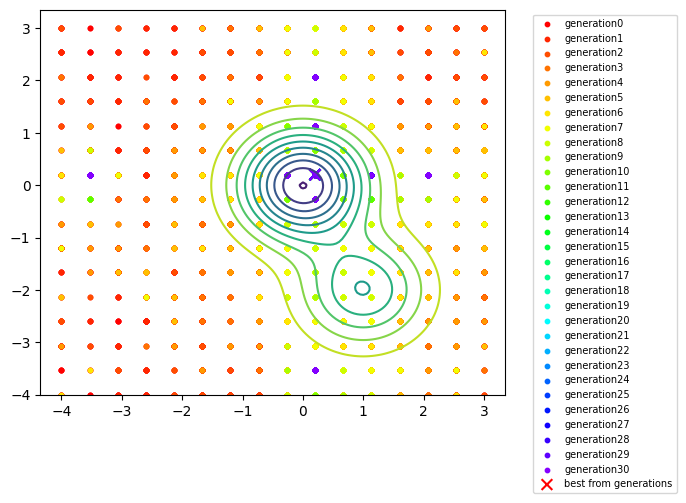

In [ ]:
genAlg = GeneticAlgorithm(8, 2, f, [-4,3], population_size=1000, tournament_size=2, crossover_probability=0.8, mutation_probability=0.05, num_steps=30)
genAlg.run_results(True, True)

Best result: 0.4965739794956542 [0.0042725913266394855, -0.007904293954283492] [1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1]
Last result: 0.4965739794956542 [0.0042725913266394855, -0.007904293954283492] [1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1]


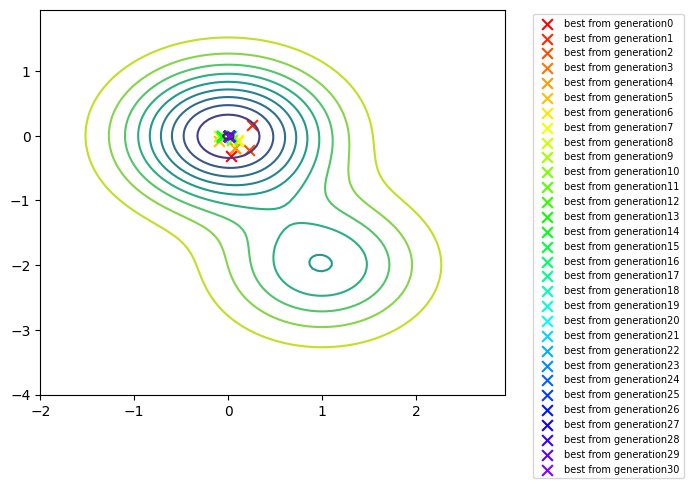

In [ ]:
genAlg = GeneticAlgorithm(30, 2, f, [-4,3], population_size=100, tournament_size=2, crossover_probability=0.8, mutation_probability=0.05, num_steps=30)
genAlg.run_results(False, True)

Best result: 0.4965724999361757 [0.0034180730613115884, -0.006836146122623177] [1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0]
Last result: 0.4965724999361757 [0.0034180730613115884, -0.006836146122623177] [1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0]


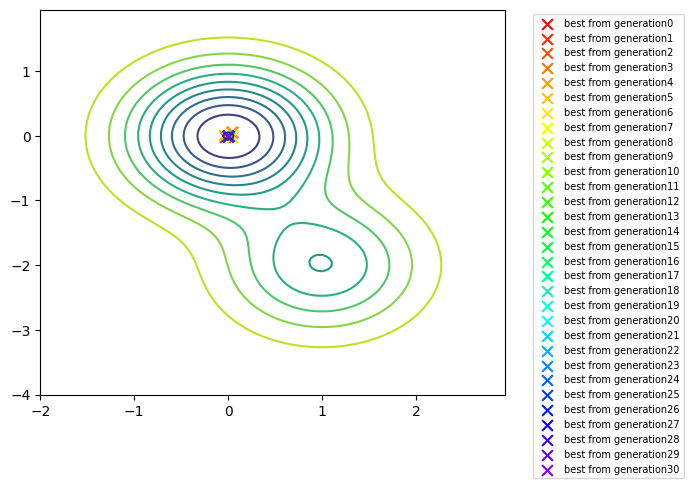

In [ ]:
genAlg = GeneticAlgorithm(30, 2, f, [-4,3], population_size=1000, tournament_size=2, crossover_probability=0.5, mutation_probability=0.05, num_steps=30)
genAlg.run_results(False, True)

Best result: 0.49670272015993905 [-0.007904293954283492, -0.007904293954283492] [1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1]
Last result: 0.49670272015993905 [-0.007904293954283492, -0.007904293954283492] [1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1]


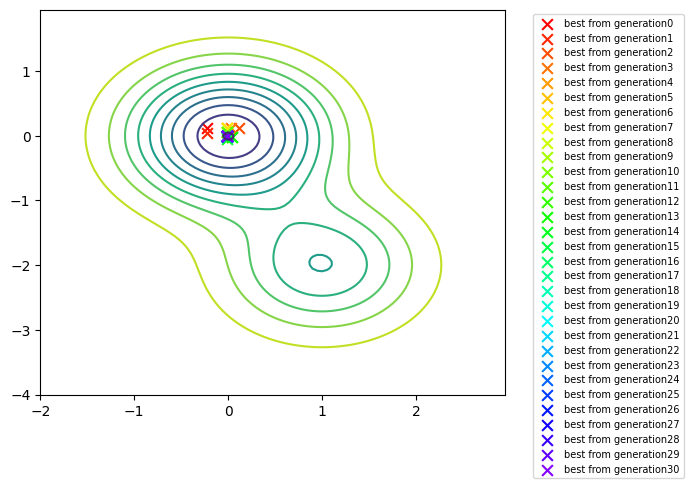

In [ ]:
genAlg = GeneticAlgorithm(30, 2, f, [-4,3], population_size=100, tournament_size=2, crossover_probability=0.8, mutation_probability=0.05, num_steps=30)
genAlg.run_results(False, True)

Best result: 0.9943419594861835 [1.0416577654347359, -1.9739371929074983] [1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0]
Last result: 0.9943419594861835 [1.0416577654347359, -1.9739371929074983] [1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0]


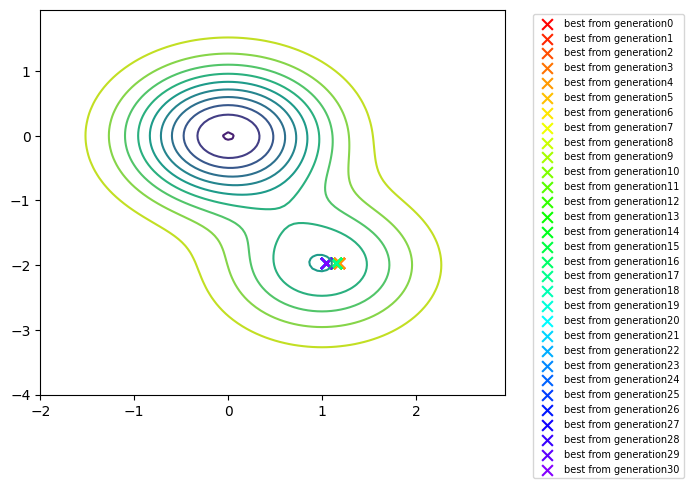

In [ ]:
genAlg = GeneticAlgorithm(30, 2, f, [-4,3], population_size=10, tournament_size=2, crossover_probability=0.5, mutation_probability=0.08, num_steps=30)
genAlg.run_results(False, True)

Algorytm genetyczny a metoda gradientowa  
zazwyczaj osiąga minimum globalne vs częściej osiągała lokalne, zależne to było od wyboru pktu startowego  

większa populacja -> lepsze wyniki (trafianie w minimum globalne, najlepsze wyniki skupione wokół niego)  
krótszy chromosom -> współrzędne, które może osiągnąć są bardziej oddalone  




# Efekty

Mała populacja, mało bitów na argument ->  
czasem najlepsze pkty bardzo oddalone, czasem dosyc blisko, czasem skupione w 1

Best result: 1.0013155253250945 [0.8571428571428572, -2.0] [1 0 1 0 0 0]
Last result: 1.0013155253250945 [0.8571428571428572, -2.0] [1 0 1 0 0 0]


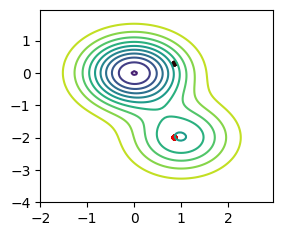

[[0.8571428571428572, 0.2857142857142856], [0.8571428571428572, 0.2857142857142856], [0.8571428571428572, 0.2857142857142856], [0.8571428571428572, 0.2857142857142856], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0], [0.8571428571428572, -2.0]]


In [ ]:
genAlg = GeneticAlgorithm(6, 2, f, [-2,2], population_size=4, tournament_size=2, crossover_probability=0.8, num_steps=20)
genAlg.run_results()

Są oddalone, chyba że trafiło blisko minimum

Best result: 0.6501188509143752 [-0.2857142857142858, 0.2857142857142856] [0 1 1 1 0 0]
Last result: 0.6501188509143752 [-0.2857142857142858, 0.2857142857142856] [0 1 1 1 0 0]


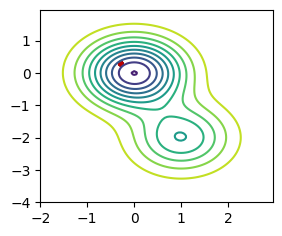

[[-0.2857142857142858, 0.2857142857142856], [-0.2857142857142858, 0.2857142857142856], [-0.2857142857142858, 0.2857142857142856], [-0.2857142857142858, 0.2857142857142856]]


In [ ]:
genAlg = GeneticAlgorithm(6, 2, f, [-2,2], population_size=4, tournament_size=2, crossover_probability=0.8, num_steps=3)
genAlg.run_results()

Losowe strzały, bez przejścia algorytmu

Best result: 1.3780220363581706 [1.4285714285714284, 0.2857142857142856] [1 1 0 1 0 0]
Last result: 1.3780220363581706 [1.4285714285714284, 0.2857142857142856] [1 1 0 1 0 0]


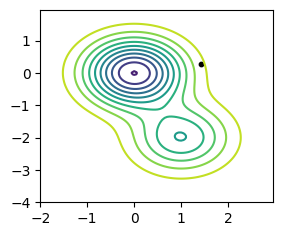

[[1.4285714285714284, 0.2857142857142856]]


In [ ]:
genAlg = GeneticAlgorithm(6, 2, f, [-2,2], population_size=2, tournament_size=2, crossover_probability=0.8, num_steps=0)
genAlg.run_results()

PRZYKŁAD dla wiekszego aoi:

Best result: 1.1040872508290154 [1.4877810361681325, -2.01564027370479] [1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0]
Last result: 1.1040872508290154 [1.4877810361681325, -2.01564027370479] [1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0]


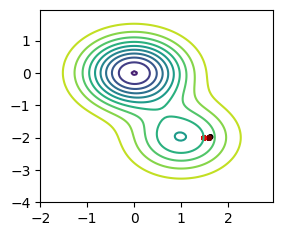

[[1.6246334310850443, -1.981427174975562], [1.6246334310850443, -1.981427174975562], [1.5972629521016621, -2.01564027370479], [1.5972629521016621, -2.01564027370479], [1.5972629521016621, -2.01564027370479], [1.5972629521016621, -2.01564027370479], [1.5972629521016621, -2.01564027370479], [1.5972629521016621, -2.01564027370479], [1.5972629521016621, -2.01564027370479], [1.5972629521016621, -2.01564027370479], [1.4877810361681325, -2.01564027370479], [1.4877810361681325, -2.01564027370479], [1.4877810361681325, -2.01564027370479], [1.4877810361681325, -2.01564027370479], [1.4877810361681325, -2.01564027370479], [1.4877810361681325, -2.01564027370479], [1.4877810361681325, -2.01564027370479], [1.4877810361681325, -2.01564027370479], [1.4877810361681325, -2.01564027370479], [1.4877810361681325, -2.01564027370479], [1.4877810361681325, -2.01564027370479]]


In [ ]:
genAlg = GeneticAlgorithm(20, 2, f, [-4,3], population_size=10, tournament_size=2, crossover_probability=0.8, num_steps=20)
genAlg.run_results()

Best result: 0.5166541770698219 [-0.03128054740957964, 0.13294232649071347] [1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0]
Last result: 0.5166541770698219 [-0.03128054740957964, 0.13294232649071347] [1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0]


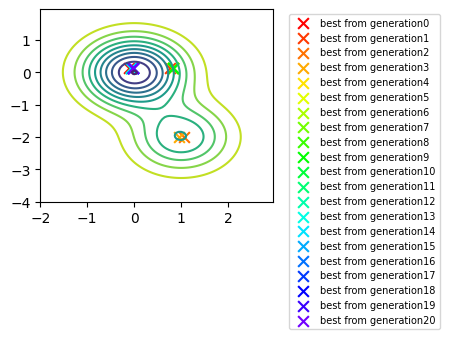

In [ ]:
genAlg = GeneticAlgorithm(20, 2, f, [-4,3], population_size=10, tournament_size=2, crossover_probability=0.8, num_steps=20)
genAlg.run_results(False,True, (3,2.5))

Więcej bitów, większa populacja ->  
pkty oscylują wokół minimum

Best result: 0.5188857349562265 [0.13880742913000965, -0.07624633431085037] [1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0]
Last result: 0.5188857349562265 [0.13880742913000965, -0.07624633431085037] [1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0]


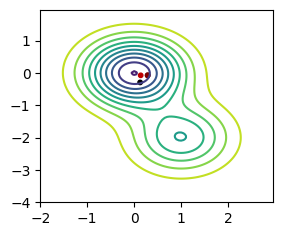

[[0.1270772238514173, -0.2952101661779081], [0.2873900293255134, -0.07624633431085037], [0.2873900293255134, -0.07624633431085037], [0.13880742913000965, -0.07624633431085037]]


In [ ]:
genAlg = GeneticAlgorithm(20, 2, f, [-2,2], population_size=40, tournament_size=2, crossover_probability=0.8, num_steps=3)
genAlg.run_results()

Best result: 0.4966028660265278 [0.0058651026392961825, -0.0019550342130987275] [1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1]
Last result: 0.496702116041145 [0.013685239491691092, -0.0019550342130987275] [1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1]


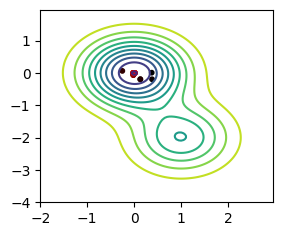

[[0.3734115347018574, 0.0058651026392961825], [0.3812316715542523, -0.1974584555229717], [0.13098729227761474, -0.1974584555229717], [0.13098729227761474, -0.1974584555229717], [-0.25219941348973607, 0.06060606060606055], [0.013685239491691092, -0.0019550342130987275], [0.0058651026392961825, -0.0019550342130987275], [0.0058651026392961825, -0.0019550342130987275], [-0.017595307917888547, -0.009775171065493637], [-0.017595307917888547, -0.0019550342130987275], [-0.017595307917888547, -0.06451612903225801], [-0.017595307917888547, -0.06451612903225801], [-0.017595307917888547, -0.06451612903225801], [-0.017595307917888547, -0.0019550342130987275], [-0.017595307917888547, -0.0019550342130987275], [-0.017595307917888547, -0.0019550342130987275], [-0.017595307917888547, -0.0019550342130987275], [-0.017595307917888547, -0.0019550342130987275], [0.013685239491691092, -0.0019550342130987275], [0.013685239491691092, -0.0019550342130987275], [0.013685239491691092, -0.0019550342130987275]]


In [ ]:
genAlg = GeneticAlgorithm(20, 2, f, [-2,2], population_size=40, tournament_size=2, crossover_probability=0.8, num_steps=20)
genAlg.run_results()

Mała populacja ->  
pkty skupione w 1/2 miejscach

Best result: 0.9002835760432384 [-0.20136852394916915, 0.6862170087976538] [0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1]
Last result: 0.9002835760432384 [-0.20136852394916915, 0.6862170087976538] [0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1]


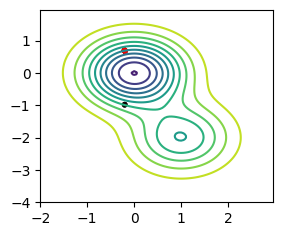

[[-0.20136852394916915, -0.9833822091886608], [-0.20136852394916915, -0.9833822091886608], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538], [-0.20136852394916915, 0.6862170087976538]]


In [ ]:
genAlg = GeneticAlgorithm(20, 2, f, [-2,2], population_size=4, tournament_size=2, crossover_probability=0.8, num_steps=20)
genAlg.run_results()

Większa populacja mniej bitów ->  
1/2/3 pkty wokol minimum

Best result: 0.6347451602229384 [0.2857142857142856, -0.2857142857142858] [1 0 0 0 1 1]
Last result: 0.6347451602229384 [0.2857142857142856, -0.2857142857142858] [1 0 0 0 1 1]


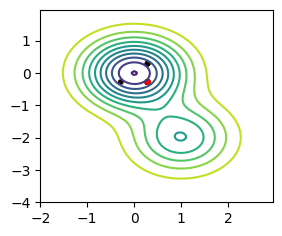

[[0.2857142857142856, 0.2857142857142856], [0.2857142857142856, 0.2857142857142856], [0.2857142857142856, 0.2857142857142856], [-0.2857142857142858, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858], [0.2857142857142856, -0.2857142857142858]]


In [ ]:
genAlg = GeneticAlgorithm(6, 2, f, [-2,2], population_size=40, tournament_size=2, crossover_probability=0.8, num_steps=20)
genAlg.run_results()

Best result: 0.5276949981638767 [0.1333333333333333, -0.1333333333333333] [1 0 0 0 0 1 1 1]
Last result: 0.5276949981638767 [0.1333333333333333, -0.1333333333333333] [1 0 0 0 0 1 1 1]


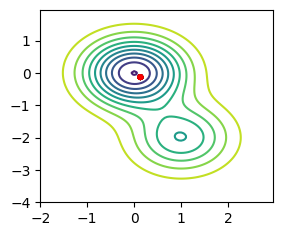

[[0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333

In [ ]:
genAlg = GeneticAlgorithm(8, 2, f, [-2,2])
genAlg.run_results()

Best result: 0.4965725186315872 [0.003479110080263581, -0.007141331217383362] [1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1]
Last result: 0.4965725186315872 [0.003479110080263581, -0.007141331217383362] [1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1]


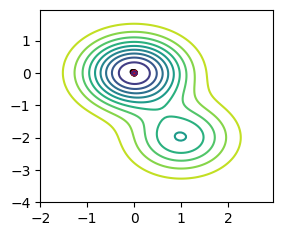

[[-0.03595080416272478, 0.031189916684469132], [-0.014954069643238643, 0.003479110080263581], [-0.004943998535111627, 0.024353770561845955], [-0.004943998535111627, 0.024353770561845955], [0.007263405255287125, -0.026673177282021454], [-0.004943998535111627, 0.016541032135990452], [0.019837031159398055, 0.012390514847254952], [-0.015198217719046614, -0.013611255226294805], [-0.011047700430310892, -0.010193182164982995], [-0.011047700430310892, -0.010193182164982995], [0.0020142216254157574, -0.023499252296517836], [0.005432294686727346, -0.006042664876247494], [0.003967406231879522, -0.008606219672231186], [0.003967406231879522, -0.008606219672231186], [0.004333628345591478, -0.008972441785943142], [0.0025025177770316986, -0.00823999755851923], [0.0033570360423595957, -0.008362071596423215], [0.00299081392864764, -0.008117923520615244], [0.00299081392864764, -0.006042664876247494], [0.00299081392864764, -0.006042664876247494], [0.00299081392864764, -0.006042664876247494], [0.0039674062

In [ ]:
genAlg = GeneticAlgorithm(30, 2, f, [-2,2])
genAlg.run_results()

Best result: 0.5324406253144173 [0.1333333333333333, 0.1333333333333333] [1 0 0 0 1 0 0 0]
Last result: 0.5324406253144173 [0.1333333333333333, 0.1333333333333333] [1 0 0 0 1 0 0 0]


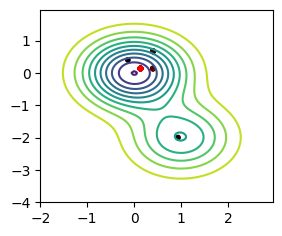

[[-0.1333333333333333, 0.3999999999999999], [0.9333333333333331, -2.0], [0.3999999999999999, 0.6666666666666665], [0.3999999999999999, 0.6666666666666665], [0.3999999999999999, 0.6666666666666665], [0.3999999999999999, 0.6666666666666665], [0.3999999999999999, 0.6666666666666665], [0.3999999999999999, 0.6666666666666665], [0.3999999999999999, 0.1333333333333333], [0.3999999999999999, 0.1333333333333333], [0.3999999999999999, 0.1333333333333333], [0.3999999999999999, 0.1333333333333333], [0.1333333333333333, 0.1333333333333333], [0.1333333333333333, 0.1333333333333333], [0.1333333333333333, 0.1333333333333333], [0.1333333333333333, 0.1333333333333333], [0.1333333333333333, 0.1333333333333333], [0.1333333333333333, 0.1333333333333333], [0.1333333333333333, 0.1333333333333333], [0.1333333333333333, 0.1333333333333333], [0.1333333333333333, 0.1333333333333333], [0.1333333333333333, 0.1333333333333333], [0.1333333333333333, 0.1333333333333333], [0.1333333333333333, 0.1333333333333333], [0.1

In [ ]:
genAlg = GeneticAlgorithm(8, 2, f, [-2,2], population_size=10)
genAlg.run_results()

Best result: 0.5276949981638767 [0.1333333333333333, -0.1333333333333333] [1 0 0 0 0 1 1 1]
Last result: 0.5276949981638767 [0.1333333333333333, -0.1333333333333333] [1 0 0 0 0 1 1 1]


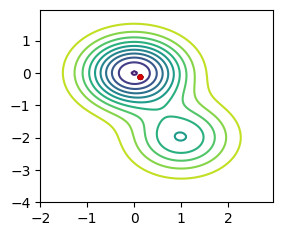

[[0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333], [0.1333333333333333, -0.1333333333333333]]


In [ ]:
genAlg = GeneticAlgorithm(8, 2, f, [-2,2], population_size=1000, num_steps=5)
genAlg.run_results()

Best result: 0.8401999461312805 [-0.5808893093661305, 0.2805871761223182] [0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0]
Last result: 0.9444752621108171 [-0.7137058626056703, 0.2805871761223182] [0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0]


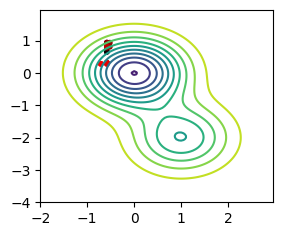

[[-0.5819879757072663, 0.6515701773125402], [-0.5819879757072663, 0.6515701773125402], [-0.5819879757072663, 0.9015778069399092], [-0.5819879757072663, 0.9015778069399092], [-0.5819879757072663, 0.9015778069399092], [-0.5819879757072663, 0.9015778069399092], [-0.5810113834040345, 0.9015778069399092], [-0.5810113834040345, 0.7765739921262247], [-0.5810113834040345, 0.7765739921262247], [-0.5810113834040345, 0.7764519180883207], [-0.5810113834040345, 0.7764519180883207], [-0.5810113834040345, 0.9014557329020052], [-0.5810113834040345, 0.9014557329020052], [-0.5810113834040345, 0.9016998809778132], [-0.5810113834040345, 0.9329508346812343], [-0.5810113834040345, 0.9329508346812343], [-0.5810113834040345, 0.9329508346812343], [-0.5185094759971922, 0.9329508346812343], [-0.5185094759971922, 0.8079470198675498], [-0.5810113834040345, 0.8079470198675498], [-0.5810113834040345, 0.8079470198675498], [-0.5810113834040345, 0.8079470198675498], [-0.5810113834040345, 0.8118533890804773], [-0.581011

In [ ]:
genAlg = GeneticAlgorithm(30, 2, f, [-2,2], population_size=2, num_steps=30, crossover_probability=0.8, mutation_probability=0.5)
genAlg.run_results()

TODO wykres pojednyczej generacji